<a href="https://colab.research.google.com/github/Thomas19SA1247/Tugas-Self-Learning/blob/main/Selasa_10_Oktober_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Pre-processing Stage

 
  Pada notebook ini berisi tentang basic dalam data pre-processing


#### Why preprocessing ?
1. Data yang kita punya dalam dunia nyata biasanya:
    * Incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data.
    * Noisy: mengandung error seperti missing values dan outliers.
    * Inconsistent: mengandung perbedaan dalam penulisan kolom.

# 1. Data Cleaning

*  Import library
Pada percobaan kali ini kita hanya membutuhkan 3 library yaitu pandas, numpy dan seaborn. Pandas berguna untuk mengimport datasetnya sedangkan numpy akan kita gunakan dalam mempreproses datanya.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns




*   Import dataset

Mari kita pakai sebuah dataset sederhana untuk latihan.
Dataset "data.csv" mengandung informasi dimana apakah user akan membeli sebuah product atau tidak.
User mempunya fitur age,salary, dan negara tempat mereka tinggal. 
Import datasetnya dengan download link dibawah:
Link Dataset: https://drive.google.com/file/d/1n0cdPoapQQilWy4EKWiyDgi4WXx-kZ7D/view?usp=sharing dan upload dataset ke dalam folder collab.


In [2]:
dataset = pd.read_csv("Data.csv")


# Menampilkan shape dari data yg kita punya
print('dataset:', (str(dataset.shape)))

dataset: (15, 4)


Dataset kita mengandung 15 rows dan 4 columns.
Itu artinya kita mempunyai 15 data dan 4 Kolom

In [3]:
# print the dataset
dataset

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


In [4]:
# Memisahkan antara fitur dan label

# Fitur
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Mengambil kolom index ke-0 sampai ke-2
X = dataset.iloc[:,:3].values

# Label
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Hanya Mengambil kolom index ke-3
Y = dataset.iloc[:,3].values

In [5]:
# Print the X and Y
print ('Fitur (X):', X)
print ('\n-----------------------------------')
print ('\nLabel (Y): ',Y)

Fitur (X): [['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 nan]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' nan 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]

-----------------------------------

Label (Y):  ['Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No']




## Handle Missing Data




In [6]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

Dengan menggunakan fungsi isnull().sum() kita dapat melihat jumlah data yg memiliki missing value dari tiap kolom yang ada.
Disini kita dapat melihat kalau terdapat 2 kolom yang memiliki masalah missing value, yaitu pada kolom 'Age' dan 'Salary'.

Untuk menangangi masalah missing value, kita bisa melakukan 2 hal. Pertama kita bisa menghapus datanya atau kita bisa mengisi nilai yang kosong itu menggunakan nilai mean/modus/median.

Pada percobaan kali ini kita akan menggunakan nilai Mean untuk mengisi missing value tersebut menggunakan bantuan Simple Imputer dari module sklearn

In [7]:
from sklearn.impute import SimpleImputer

# SimpleImputer class mempunyai 2 parameter, yaitu :
#     missing_values : Missing value pada data kita, biasanya diisi dengan np.nan
#     strategy       : Strategi yang akan kita gunakan dalam menangani missing value (Mean/Modus/Median).
#                      Defaultnya parameter strategy 'mean'

imputer = SimpleImputer(missing_values = np.nan ,strategy = 'mean')


# Fit imputer kedalam data X untuk kolom Age (index ke-1) dan Salary (index ke-2).
imputer = imputer.fit(X[:,1:3])

#Replace missing value dengan mean pada kolom tersebut
X[:,1:3] = imputer.transform(X[:,1:3])


Dibawah ini kita bisa melihat bahwa tidak ada nilai 'Nan' pada data X

In [8]:
print ('X: ', X)

X:  [['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 54857.142857142855]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' 33.714285714285715 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]


* Mean Value of Age    = Sum of all age values /14   = 33.714285714285715
* Mean Value of Salary = Sum of all Salary value /14 = 54857.142857142855

## SMOTE

Imbalance Data (Ketidakseimbangan Kelas) adalah masalah yang cukup sering terjadi dimanifestasikan dalam deteksi penipuan, deteksi intrusi, deteksi aktivitas Mencurigakan untuk beberapa nama. Dalam konteks klasifikasi biner, kelas yang lebih jarang muncul disebut kelas minoritas, dan kelas yang lebih sering muncul disebut kelas mayoritas.

Langkah pertama membuat kumpulan data sampel

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn import metrics

In [10]:
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Splitting sata menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 2) (800,)
Test set: (200, 2) (200,)


make_classification adalah fungsi yang cukup berguna untuk membuat beberapa data eksperimental untuk Anda. Parameter penting di sini adalah bobot yang memastikan 95% berasal dari satu kelas dan 5% dari kelas lainnya.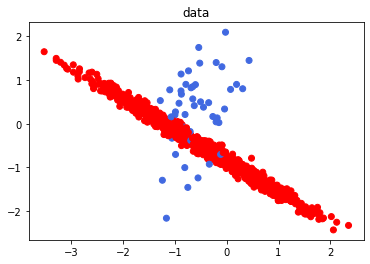

Dapat dipahami bahwa kelas merah adalah kelas mayoritas dan kelas biru adalah kelas minoritas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


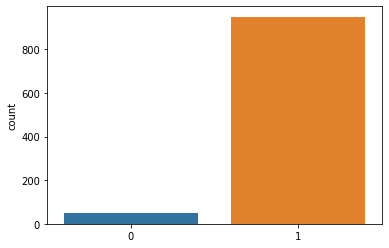

In [13]:
sns.countplot(y)

jika kita plot count maka dapat dilihat lebih jelas adanya imbalance data di y atau label. Maka selanjutnya kita akan split data dan lihat hasil klasifikasinya dengan model Logistic Regression, ketika sebelum dan sesudah data label di masukan dalam model SMOTE.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_res, y_res = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


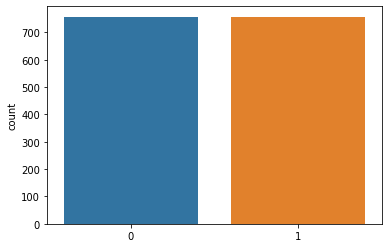

In [16]:
sns.countplot(y_res)

Perhatikan bahwa plotcount sekarang sudah sama antara kelas 0 dan 1. 

## Redundency Data

Redudansi data adalah duplikasi atau penyimpanan data yang sama secara berulang dalam beberapa file, sehingga data yang sama di simpan di dalam lebih dari 1 lokasi. Redudansi menyebabkan masalah pada waktu memperbarui (update) data, serta dapat menghabiskan tempat penyimpanan data dan juga menimbulkan inkonsisten data, yang berarti dokumen yang sama mungkin mempunyai data yang berbeda. Akhirnya, Redundansi mengakibatkan data menjadi tidak konsisten. Penyimpanan dibeberapa tempat untuk data yang sama ini disebut sebagai redundansi dan mengakibatkan pemborosan ruang penyimpanan dan juga biaya untuk akses lebih tinggi.

Dapat dilihat contoh dibawah dimana kami akan membuat sebuah dataset yang sederhana:

In [17]:
data = { 'Names':['Yusuf','Allafa','Abdiel','Ipin','Ibnu','Rifal','Haidar','Yusuf','Yusuf'],
         'Marks':[56,89,90,45,34,65,77,56,56],
         'City' :['Jakarta','Yogyakarta','Solo','Surabaya','Makasar','Malang','Yogyakarta','Jakarta','Jakarta']}

df = pd.DataFrame(data)
df

,Names,Marks,City
0,Yusuf,56,Jakarta
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makasar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta
7,Yusuf,56,Jakarta
8,Yusuf,56,Jakarta


Dapat dilihat pada dataset kita bahwa baris 1 dan baris terakhir memiliki duplika data. Oleh karena itu cara mengatasinya dengan menghilangkan salah satu baris tersebut, dengan menggunakan fungsi pandas yaitu **drop_duplicates()**

In [18]:
df.drop_duplicates(subset='Names', keep='first')

,Names,Marks,City
0,Yusuf,56,Jakarta
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makasar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta


In [19]:
df.drop_duplicates(subset='Names', keep='last')

,Names,Marks,City
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makasar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta
8,Yusuf,56,Jakarta


In [20]:
df.drop_duplicates(subset='Names', keep=False)

,Names,Marks,City
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makasar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta


In [21]:
df.drop_duplicates(subset='Names', keep=False, inplace=True)
df

,Names,Marks,City
1,Allafa,89,Yogyakarta
2,Abdiel,90,Solo
3,Ipin,45,Surabaya
4,Ibnu,34,Makasar
5,Rifal,65,Malang
6,Haidar,77,Yogyakarta


# 2. Data Integration


Sejauh ini, kami telah memastikan untuk menghilangkan pengotor dalam data
dan membuatnya bersih. Sekarang, langkah selanjutnya adalah menggabungkan data dari berbagai sumber untuk mendapatkan struktur terpadu dengan informasi yang lebih bermakna dan berharga. Ini sebagian besar digunakan jika data dipisahkan ke dalam sumber yang berbeda. Untuk membuatnya sederhana, mari kita asumsikan kita memiliki data dalam format CSV di tempat yang berbeda, semuanya berbicara tentang skenario yang sama. Katakanlah kita memiliki beberapa data tentang seorang karyawan dalam database. Kami tidak dapat mengharapkan semua data tentang karyawan berada di tabel yang sama. Ada kemungkinan bahwa data pribadi karyawan akan ditempatkan di satu tabel, riwayat proyek karyawan akan berada di tabel kedua, detail waktu masuk dan waktu keluar karyawan akan berada di tabel lain, dan seterusnya. Jadi, jika kita ingin melakukan beberapa analisis tentang karyawan, kita perlu mendapatkan semua data karyawan di satu tempat yang sama. Proses menyatukan data di satu tempat ini disebut integrasi data. Untuk melakukan integrasi data, kita dapat menggabungkan beberapa panda DataFrames menggunakan fungsi **merge**.

Dalam latihan ini, kita akan menggabungkan rincian siswa dari dua dataset, yaitu student.csv dan marks.csv. Dataset siswa berisi kolom seperti jenis kelamin, ras/etnis, tingkat pendidikan orang tua, dan makan siang. Kumpulan data marks.csv berisi kolom seperti kursus persiapan ujian, skor matematika, skor membaca,dan skor menulis. Kolom Student_id adalah umum di antara dua kumpulan data. Ikuti langkah-langkah ini untuk menyelesaikan latihan ini:

Dapat di download datasetnya: 


1.   Student: https://drive.google.com/file/d/1LqhvBTu43Vl_yxAdkv2n01eg4ZOdYRUp/view?usp=sharing
2.   
Mark : https://drive.google.com/file/d/1Lmrmp7t6Aco_a8yIF7m037N2EsV95I_g/view?usp=sharing






In [22]:
# Input Dataset 
dataset1 = "/content/Students.csv"
dataset2 = "/content/Mark.csv"

In [23]:
# Define Dataset
df1 = pd.read_csv(dataset1, header = 0)

df2 = pd.read_csv(dataset2, header = 0)

In [24]:
# Cek Dataset
df1.head()

,student ID,gender,race/ethnicity,parental level of education,lunch
0,1,female,group B,bachelor's degree,standard
1,2,female,group C,some college,standard
2,3,female,group B,master's degree,standard
3,4,male,group A,associate's degree,free/reduced
4,5,male,group C,some college,standard


In [25]:
df2.head()

,student ID,test preparation course,math score,reading score,writing score
0,1,none,72,72,74
1,2,completed,69,90,88
2,3,none,90,95,93
3,4,none,47,57,44
4,5,none,76,78,75


Dapat dilihat memiliki dua dataset yang berbeda, dan kami bisa anggap bahwa darikedua dataset tersebut diperoleh dari kedua divisi yang berbeda di sekolah. Oleh karena itu sekarang proses integrasi data adalah pelemburan antara kedua dataset tersebut untuk dapat menjadi satu dataset yang baru, denagn syarat kedua dataset terintegrasi melalui column student ID. 

In [26]:
# Integrasi Data
df = pd.merge(df1, df2, on = 'student ID')

Sesudah terjadi integrasi data, maka dapat dilihat pada dataset yang baru.

In [27]:
df.head(10)

,student ID,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,2,female,group C,some college,standard,completed,69,90,88
2,3,female,group B,master's degree,standard,none,90,95,93
3,4,male,group A,associate's degree,free/reduced,none,47,57,44
4,5,male,group C,some college,standard,none,76,78,75
5,6,female,group B,associate's degree,standard,none,71,83,78
6,7,female,group B,some college,standard,completed,88,95,92
7,8,male,group B,some college,free/reduced,none,40,43,39
8,9,male,group D,high school,free/reduced,completed,64,64,67
9,10,female,group B,high school,free/reduced,none,38,60,50


# 3. Data Transformation

### **Melanjutkan dari proses data cleaning.**

In [28]:
dataset = pd.read_csv("Data.csv")


# Menampilkan shape dari data yg kita punya
print('dataset:', (str(dataset.shape)))
dataset

dataset: (15, 4)


,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


In [29]:
# Memisahkan antara fitur dan label

# Fitur
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Mengambil kolom index ke-0 sampai ke-2
X = dataset.iloc[:,:3].values

# Label
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Hanya Mengambil kolom index ke-3
Y = dataset.iloc[:,3].values

In [30]:
# Print the X and Y
print ('Fitur (X):', X)
print ('\n-----------------------------------')
print ('\nLabel (Y): ',Y)

Fitur (X): [['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 nan]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' nan 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]

-----------------------------------

Label (Y):  ['Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No']


In [31]:
from sklearn.impute import SimpleImputer

# SimpleImputer class mempunyai 2 parameter, yaitu :
#     missing_values : Missing value pada data kita, biasanya diisi dengan np.nan
#     strategy       : Strategi yang akan kita gunakan dalam menangani missing value (Mean/Modus/Median).
#                      Defaultnya parameter strategy 'mean'

imputer = SimpleImputer(missing_values = np.nan ,strategy = 'mean')


# Fit imputer kedalam data X untuk kolom Age (index ke-1) dan Salary (index ke-2).
imputer = imputer.fit(X[:,1:3])

#Replace missing value dengan mean pada kolom tersebut
X[:,1:3] = imputer.transform(X[:,1:3])


## Encode the Categorical data

Categorical data biasanya memiliki tipe data string.
Beberapa algoritma dapat memproses categorical data yg berbentuka string secara langsung seperti decision tree.

Akan tetapi banyak machine learning algorithms tidak dapat memproses categorical data yg berbentuk string secara langsung. Mereka membutuhkan variabel yg berbentuk numeric.

Itu artinya categorical data harus dikonversi bentukanya kedalam numerical form.

Pada Dataset kita terdapat dua kolom categorical data

Yaitu kolom 'Country' dan 'Purchased'

#### Label Encoder: 

    * Metode ini bisa digunakan untuk mentranform non-numerical labels kedalam bentuk numerical labels (or nominal
      categorical variables).
    * Numerical labels akan selalu ada diantara 0 sampai n_classes-1. 
      Misalkan ada 3 kelas, berarti labelnya ada di 0, 1, dan 2.

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Encode untuk data kategorikal pada kolom 'Country'
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,0]

array([1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2], dtype=object)

Sekarang categorical value untuk kolom 'Country' dirbah ke dalam bentuk kategorikal

| Country | Value |
|:--------|:------|
| China   |   0   |  
| India   |   1   |   
| Srilanka|   2   |   


In [ ]:
X

array([[ 6.14000000e+02, -7.91565162e-01],
       [ 3.81000000e+02, -3.10133353e-01],
       [ 5.34000000e+02, -6.41502240e-01],
       ...,
       [ 3.10000000e+01,  9.22372792e-01],
       [ 4.27000000e+02, -1.99140682e-01],
       [ 7.40000000e+01,  5.08078845e-01]])

Sekarang categorical value untuk kolom 'Purchased' dirubah ke dalam bentuk kategorikal

| Purchased| Value |
|:---------|:------|
| No       |   0   |  
| Yes      |    1  |   

In [ ]:
#Encode untuk data kategorikal pada kolom 'Purchased'
labelencoder_Y = LabelEncoder()
Y = labelencoder_X.fit_transform(Y)
Y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

## Scale your Features

Dalam sebuah dataset, biasanya nilai pada tiap fitur mempunyai range yg berbeda. Hal ini dapat menjadikan masalah untuk
beberapa model machine learning. Untuk itu kita harus melakukan scaling agar semua nilai pada fitur memiliki range yang sama. Tetapi
Pertama, Kita akan melihat hasil ketika proses scaling diabaikan dan langsung masuk ke pemodelan.


In [34]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

# We need to fit and transform the training set
X = sc_X.fit_transform(X)

In [ ]:
X

array([[ 0.39663983, -0.470561  ],
       [-0.41049625,  0.17174246],
       [ 0.11951157, -0.27035418],
       ...,
       [-1.62293242,  1.81609364],
       [-0.25114749,  0.31982361],
       [-1.47397597,  1.26336233]])

sekarang dapat dilihat bahwa X tiap column akan di standarisasi sesuai range antara 0 dan 1.